In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import dataset as ds
import preprocess as pr
import htr

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as ag

In [28]:
from importlib import reload

In [3]:
reload(ds)

<module 'dataset' from '/Users/atadenizaydin/Documents/course material/cs491/nino-server/seg/dataset.py'>

In [46]:
reload(torch)

<module 'torch' from '/Users/atadenizaydin/anaconda2/envs/slt-ce/lib/python3.5/site-packages/torch/__init__.py'>

In [3]:
%%time
iam = ds.IAMDataset('words', '/Users/atadenizaydin/Documents/course material/cs491/SimpleHTR/data',
                   msb=True, tabulate=True, sort=True)

CPU times: user 57.5 s, sys: 1.03 s, total: 58.5 s
Wall time: 2min 20s


In [26]:
%%time
iamtr100 = pr.IAMTrainDataset(iam, 'train100', 100, verbose=True, create=True, normalize=False)

Processing 41 batches of 4031 images of width 16 (1/31)
Processing 137 batches of 13672 images of width 32 (2/31)
Processing 161 batches of 16008 images of width 48 (3/31)
Processing 160 batches of 15996 images of width 64 (4/31)
Processing 135 batches of 13493 images of width 80 (5/31)
Processing 105 batches of 10438 images of width 96 (6/31)
Could not read a01-117-05-02
Processing 74 batches of 7342 images of width 112 (7/31)
Processing 52 batches of 5146 images of width 128 (8/31)
Processing 36 batches of 3507 images of width 144 (9/31)
Processing 24 batches of 2334 images of width 160 (10/31)
Could not read r06-022-03-05
Processing 16 batches of 1533 images of width 176 (11/31)
Processing 11 batches of 1037 images of width 192 (12/31)
Processing 7 batches of 678 images of width 208 (13/31)
Processing 5 batches of 443 images of width 224 (14/31)
Processing 3 batches of 281 images of width 240 (15/31)
Processing 2 batches of 155 images of width 256 (16/31)
Processing 2 batches of 124

In [4]:
len(iamtr100)

985

In [29]:
reload(htr)

<module 'htr' from '/Users/atadenizaydin/Documents/course material/cs491/nino-server/seg/htr.py'>

In [42]:
trec100 = htr.TextRecognizer(lr=1e-3)

In [43]:
import torch
trec100.rec = torch.nn.DataParallel(trec100.rec)

In [37]:
s = iamtr100.samlist[363]
bb = np.load(s.path)

In [38]:
bb.shape

(98, 32, 48)

In [39]:
s.text

'the.kitaweTheytoa,inmyofthe.of..Legaat.ainitbegofartheanyintoat.INitsINtoaofMostofaofallforofa.oftoforisa,toinaThislastpointinfrompartsout..dealgreatbut..innottheofistohistheplaytoHehungITforpollthathis.ahadnoheardGambaandthat.Byronup'

In [40]:
s.lengths

array([3, 1, 3, 1, 2, 4, 2, 1, 1, 2, 2, 2, 3, 1, 2, 1, 1, 4, 2, 1, 1, 2,
       2, 2, 2, 3, 3, 3, 2, 2, 2, 1, 2, 3, 2, 2, 1, 2, 4, 2, 1, 2, 3, 3,
       2, 1, 1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 4, 4, 5, 2, 4, 5, 3, 1, 1, 4,
       5, 3, 1, 1, 2, 3, 3, 2, 2, 2, 3, 3, 4, 2, 2, 4, 2, 3, 4, 4, 3, 1,
       1, 3, 2, 5, 5, 3, 4, 1, 5, 2], dtype=int32)

In [41]:
s.lengths.shape

(98,)

In [36]:
trec100.trainbatch(s)

tensor(8.6412, grad_fn=<MulBackward0>)

In [27]:
%%time
scores100 = trec100.train(iamtr100.samlist[363:463], verbose=10, eps=1)

Iteration 10: 3.298581
Iteration 20: 3.152087
Iteration 30: 3.420067
Iteration 40: 3.287111
Iteration 50: 3.271359
Iteration 60: 3.339536
Iteration 70: 3.145635
Iteration 80: 3.129911
Iteration 90: 3.176097
Iteration 100: 3.091722
CPU times: user 29min 37s, sys: 2min 19s, total: 31min 56s
Wall time: 1h 21min 39s


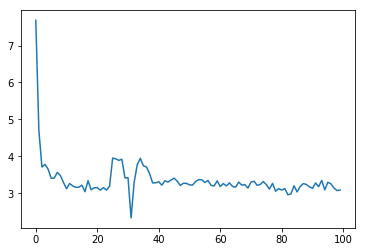

In [28]:
plt.plot(scores100)
plt.show()

In [29]:
torch.save(trec100.rec.state_dict(), iam.topdir + '/trec100_1.pt')

In [209]:
trec2 = htr.TextRecognizer(lr=1e-3)
trec2.rec = nn.DataParallel(trec2.rec)
trec2.rec.load_state_dict(torch.load(iam.topdir + '/trec100_8.pt'))
# trec2.rec.load_state_dict(trec100.rec.state_dict())

In [44]:
%%time
scores100 = trec100.train(iamtr100.samlist[363:373], verbose=10, eps=10)

Iteration 10: 3.435949
Iteration 20: 3.204810
Iteration 30: 3.175855
Iteration 40: 3.050184
Iteration 50: 2.929577
Iteration 60: 2.833897
Iteration 70: 2.734296
Iteration 80: 2.615829
Iteration 90: 2.673977
Iteration 100: 2.640575
CPU times: user 9min 47s, sys: 47.4 s, total: 10min 34s
Wall time: 25min 33s


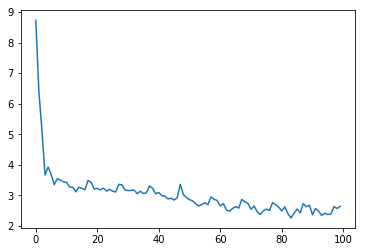

In [45]:
plt.plot(scores100)
plt.show()

In [46]:
torch.save(trec100.rec.state_dict(), iam.topdir + '/trec100_3.pt')

In [8]:
trec2 = htr.TextRecognizer(lr=1e-3)
trec2.rec = nn.DataParallel(trec2.rec)
trec2.rec.load_state_dict(torch.load(iam.topdir + '/trec100_2.pt'))
# trec2.rec.load_state_dict(trec100.rec.state_dict())

In [47]:
%%time
scores2 = trec100.train(iamtr100.samlist[363:403], verbose=10, eps=10)

Iteration 10: 2.419921
Iteration 20: 2.107512
Iteration 30: 3.243068
Iteration 40: 3.052589
Iteration 50: 2.593372
Iteration 60: 2.065600
Iteration 70: 3.288034
Iteration 80: 2.837243
Iteration 90: 2.391646
Iteration 100: 1.960124
Iteration 110: 3.189331
Iteration 120: 2.740664
Iteration 130: 2.208976
Iteration 140: 1.901927
Iteration 150: 3.034408
Iteration 160: 2.782810
Iteration 170: 2.131191
Iteration 180: 1.833810
Iteration 190: 3.010420
Iteration 200: 2.778497
Iteration 210: 2.060569
Iteration 220: 1.757649
Iteration 230: 3.015941
Iteration 240: 2.837948
Iteration 250: 2.130226
Iteration 260: 1.695148
Iteration 270: 2.744264
Iteration 280: 2.715287
Iteration 290: 1.932465
Iteration 300: 1.648077
Iteration 310: 2.742335
Iteration 320: 2.532961
Iteration 330: 1.759512
Iteration 340: 1.596226
Iteration 350: 2.611535
Iteration 360: 2.627742
Iteration 370: 1.717258
Iteration 380: 1.520391
Iteration 390: 2.744577
Iteration 400: 2.472156
CPU times: user 33min 52s, sys: 2min 36s, total: 

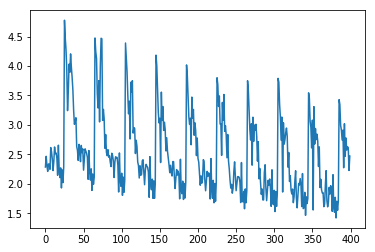

In [48]:
plt.plot(scores2)
plt.show()

In [82]:
torch.save(trec100.rec.state_dict(), iam.topdir + '/trec100_8.pt')

In [50]:
%%time
scores100 = trec100.train(iamtr100.samlist[363:463], verbose=10, eps=10)

Iteration 10: 1.614214
Iteration 20: 1.335110
Iteration 30: 2.630156
Iteration 40: 2.418713
Iteration 50: 2.503980
Iteration 60: 2.636527
Iteration 70: 2.229205
Iteration 80: 2.111263
Iteration 90: 1.914337
Iteration 100: 2.003268
Iteration 110: 1.350953
Iteration 120: 1.260215
Iteration 130: 2.752114
Iteration 140: 2.166148
Iteration 150: 2.371261
Iteration 160: 2.455833
Iteration 170: 2.011900
Iteration 180: 1.922797
Iteration 190: 1.770080
Iteration 200: 1.820625
Iteration 210: 1.164338
Iteration 220: 1.097048
Iteration 230: 2.455754
Iteration 240: 2.033392
Iteration 250: 2.205728
Iteration 260: 2.207094
Iteration 270: 1.747822
Iteration 280: 1.694297
Iteration 290: 1.532416
Iteration 300: 1.643464
Iteration 310: 1.153218
Iteration 320: 0.985474
Iteration 330: 2.220833
Iteration 340: 1.864210
Iteration 350: 2.089404
Iteration 360: 2.082698
Iteration 370: 1.609062
Iteration 380: 1.592666
Iteration 390: 1.436241
Iteration 400: 1.459666
Iteration 410: 1.032443
Iteration 420: 1.044041
I

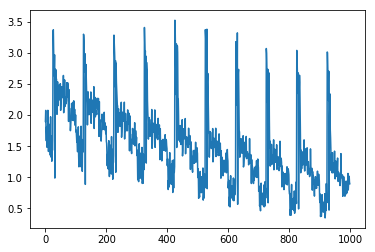

In [51]:
plt.plot(scores100)
plt.show()

In [53]:
%%time
scores100 = trec100.train(iamtr100.samlist[363:463], verbose=10, eps=5)

Iteration 10: 0.515363
Iteration 20: 0.498622
Iteration 30: 2.185720
Iteration 40: 1.302027
Iteration 50: 1.335064
Iteration 60: 1.268526
Iteration 70: 0.903863
Iteration 80: 0.857102
Iteration 90: 0.654280
Iteration 100: 0.799947
Iteration 110: 0.405746
Iteration 120: 0.304444
Iteration 130: 2.295399
Iteration 140: 1.040665
Iteration 150: 1.272202
Iteration 160: 1.159400
Iteration 170: 0.814589
Iteration 180: 0.802324
Iteration 190: 0.583704
Iteration 200: 0.721151
Iteration 210: 0.315688
Iteration 220: 0.313734
Iteration 230: 2.084915
Iteration 240: 0.969834
Iteration 250: 1.247323
Iteration 260: 1.025308
Iteration 270: 0.747379
Iteration 280: 0.739567
Iteration 290: 0.514823
Iteration 300: 0.670415
Iteration 310: 0.290037
Iteration 320: 0.239566
Iteration 330: 1.940176
Iteration 340: 0.940471
Iteration 350: 1.148716
Iteration 360: 1.085874
Iteration 370: 0.640565
Iteration 380: 0.714090
Iteration 390: 0.453474
Iteration 400: 0.555522
Iteration 410: 0.299496
Iteration 420: 0.219876
I

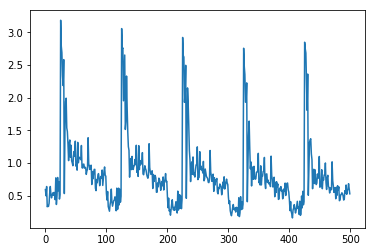

In [54]:
plt.plot(scores100)
plt.show()

In [76]:
%%time
scores100 = trec100.train(iamtr100.samlist[463:563], verbose=10, eps=5)

Iteration 10: 1.191248
Iteration 20: 1.053387
Iteration 30: 0.677954
Iteration 40: 1.061237
Iteration 50: 1.246740
Iteration 60: 0.840089
Iteration 70: 1.582201
Iteration 80: 0.914240
Iteration 90: 1.119523
Iteration 100: 2.298021
Iteration 110: 0.976728
Iteration 120: 0.919885
Iteration 130: 0.510146
Iteration 140: 0.793934
Iteration 150: 0.896151
Iteration 160: 0.681928
Iteration 170: 1.176524
Iteration 180: 0.742128
Iteration 190: 0.862145
Iteration 200: 1.558716
Iteration 210: 0.736161
Iteration 220: 0.641986
Iteration 230: 0.358177
Iteration 240: 0.673459
Iteration 250: 0.728526
Iteration 260: 0.546498
Iteration 270: 0.821362
Iteration 280: 0.655877
Iteration 290: 0.604526
Iteration 300: 1.297035
Iteration 310: 0.612211
Iteration 320: 0.520915
Iteration 330: 0.284221
Iteration 340: 0.489163
Iteration 350: 0.578702
Iteration 360: 0.476158
Iteration 370: 0.714409
Iteration 380: 0.534390
Iteration 390: 0.511467
Iteration 400: 1.141918
Iteration 410: 0.488794
Iteration 420: 0.436431
I

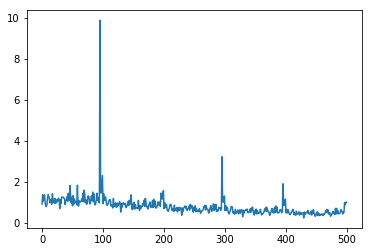

In [77]:
plt.plot(scores100)
plt.show()

Iteration 10: 0.378236
Iteration 20: 0.246461
Iteration 30: 2.370189
Iteration 40: 0.933090
Iteration 50: 1.089069
Iteration 60: 0.982773
Iteration 70: 0.707705
Iteration 80: 0.835767
Iteration 90: 0.488134
Iteration 100: 0.587190
Iteration 110: 0.592298
Iteration 120: 0.457837
Iteration 130: 0.225992
Iteration 140: 0.474182
Iteration 150: 0.505938
Iteration 160: 0.350991
Iteration 170: 0.682807
Iteration 180: 0.458711
Iteration 190: 0.435853
Iteration 200: 1.023430
Iteration 210: 0.262945
Iteration 220: 0.279752
Iteration 230: 2.065020
Iteration 240: 0.826193
Iteration 250: 0.852902
Iteration 260: 0.830761
Iteration 270: 0.506113
Iteration 280: 0.671126
Iteration 290: 0.355709
Iteration 300: 0.472557
Iteration 310: 0.455471
Iteration 320: 0.399867
Iteration 330: 0.173460
Iteration 340: 0.382118
Iteration 350: 0.405437
Iteration 360: 0.334699
Iteration 370: 0.553876
Iteration 380: 0.367412
Iteration 390: 0.413066
Iteration 400: 0.875785
Iteration 410: 0.202841
Iteration 420: 0.227414
I

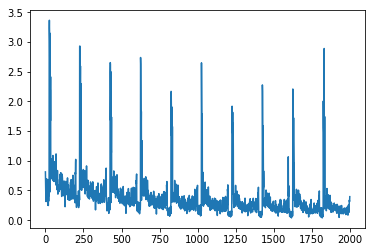

CPU times: user 3h 23min 30s, sys: 16min 59s, total: 3h 40min 29s
Wall time: 5h 58s


In [79]:
%%time
scores100 = trec100.train(iamtr100.samlist[363:563], verbose=10, eps=10)
plt.plot(scores100)
plt.show()

Iteration 10: 0.065257
Iteration 20: 0.046730
Iteration 30: 1.291814
Iteration 40: 0.237045
Iteration 50: 0.488015
Iteration 60: 0.290047
Iteration 70: 0.193552
Iteration 80: 0.235025
Iteration 90: 0.112574
Iteration 100: 0.158492
Iteration 110: 0.150775
Iteration 120: 0.126199
Iteration 130: 0.049860
Iteration 140: 0.098647
Iteration 150: 0.125122
Iteration 160: 0.103361
Iteration 170: 0.219729
Iteration 180: 0.116621
Iteration 190: 0.129490
Iteration 200: 0.303490
Iteration 210: 1.435127
Iteration 220: 1.335931
Iteration 230: 1.561493
Iteration 240: 1.294226
Iteration 250: 1.004864
Iteration 260: 1.122933
Iteration 270: 1.124752
Iteration 280: 0.920583
Iteration 290: 1.087582
Iteration 300: 0.788324
Iteration 310: 0.824534
Iteration 320: 1.034130
Iteration 330: 0.696821
Iteration 340: 0.989422
Iteration 350: 1.049955
Iteration 360: 1.068124
Iteration 370: 0.966143
Iteration 380: 1.061049
Iteration 390: 0.911284
Iteration 400: 0.962566
Iteration 410: 0.177879
Iteration 420: 0.226270
I

Iteration 3340: 0.059202
Iteration 3350: 0.063481
Iteration 3360: 0.061898
Iteration 3370: 0.062663
Iteration 3380: 0.064974
Iteration 3390: 0.055518
Iteration 3400: 0.253127
Iteration 3410: 0.183869
Iteration 3420: 0.260401
Iteration 3430: 0.302878
Iteration 3440: 0.193512
Iteration 3450: 0.186384
Iteration 3460: 0.235488
Iteration 3470: 0.340833
Iteration 3480: 0.177119
Iteration 3490: 0.163182
Iteration 3500: 0.169629
Iteration 3510: 0.187284
Iteration 3520: 0.185456
Iteration 3530: 0.145258
Iteration 3540: 0.291852
Iteration 3550: 0.216942
Iteration 3560: 0.271198
Iteration 3570: 0.296817
Iteration 3580: 0.240960
Iteration 3590: 0.207283
Iteration 3600: 0.228271
Iteration 3610: 0.023964
Iteration 3620: 0.009590
Iteration 3630: 0.368712
Iteration 3640: 0.091811
Iteration 3650: 0.321477
Iteration 3660: 0.158328
Iteration 3670: 0.079895
Iteration 3680: 0.085421
Iteration 3690: 0.075429
Iteration 3700: 0.087884
Iteration 3710: 0.113746
Iteration 3720: 0.059703
Iteration 3730: 0.024384


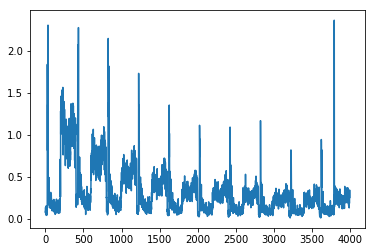

CPU times: user 7h 30min 38s, sys: 39min 59s, total: 8h 10min 38s
Wall time: 9h 55min 27s


In [81]:
%%time
scores100 = trec100.train(iamtr100.samlist[363:763], verbose=10, eps=10)
plt.plot(scores100)
plt.show()

In [ ]:
%%time
scores100 = trec100.train(iamtr100.samlist[:363] + iamtr100.samlist[563:], verbose=20, eps=10)
plt.plot(scores100)
plt.show()

Iteration 20: 0.473570
Iteration 40: 0.463557
Iteration 60: 0.609957
Iteration 80: 0.643119
Iteration 100: 0.604799
Iteration 120: 0.395116
Iteration 140: 0.289607
Iteration 160: 0.541965
Iteration 180: 3.792501
Iteration 200: 2.069690
Iteration 220: 1.702482
Iteration 240: 0.784114
Iteration 260: 0.838988
Iteration 280: 0.534896
Iteration 300: 0.301573
Iteration 320: 0.421587
Iteration 340: 0.627564
Iteration 360: 0.665973
Iteration 380: 0.975471
Iteration 400: 0.541532
Iteration 420: 0.431048
Iteration 440: 0.452820
Iteration 460: 0.360142
Iteration 480: 0.392960
Iteration 500: 0.480316
Iteration 520: 0.549276
Iteration 540: 0.561037
Iteration 560: 0.577403
Iteration 580: 0.763922
Iteration 588 threw exception
Iteration 600: 0.826891
Iteration 620: 1.005585
Iteration 640: 1.024929
Iteration 660: 0.612617
Iteration 680: 0.798912
Iteration 700: 0.907517
Iteration 720: 0.609169
Iteration 740: 0.841786
Iteration 760: 0.715201


In [88]:
s = iamtr100.samlist[800]
bb = np.load(s.path)

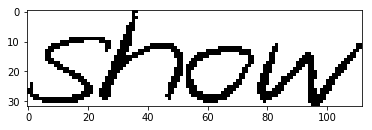

In [189]:
plt.imshow(bb[73], cmap='gray')

In [178]:
s.text[sum(s.lengths[:41]):sum(s.lengths[:42])]

'moment'

In [90]:
n, h, w = bb.shape
inputb = ag.Variable(torch.Tensor(bb.reshape(n,1,h,w)))
targets = ag.Variable(torch.IntTensor(trec100.encode(s.text)))
in_lengths = ag.Variable(torch.IntTensor([int(w/8)]*n))
tar_lengths = ag.Variable(torch.IntTensor(s.lengths))

In [91]:
with torch.no_grad():
    output = trec100.rec(inputb)
    cost = trec100.loss1(output, targets, in_lengths, tar_lengths)

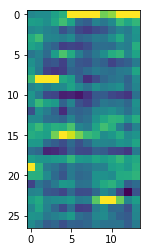

In [190]:
plt.imshow(output[:,73].detach().numpy().T)
plt.show()

In [131]:
import tensorflow as tf

In [191]:
import editdistance as ed

In [268]:
def infer(trec, inputs):
    n, h, w = inputs.shape
    with torch.no_grad():
        outputs = trec.rec(ag.Variable(torch.Tensor(inputs.reshape(n,1,h,w))))
    tf_inputs = tf.convert_to_tensor(outputs.detach().numpy())
    tf_seq_length = tf.convert_to_tensor([w//8]*n)
    dec = tf.nn.ctc_beam_search_decoder(tf_inputs, tf_seq_length)
    with tf.Session() as sess:
        out = sess.run(dec)[0][0]
    
    strs = [''] * n
    for ind, val in zip(out.indices, out.values):
        if val != 0:
            strs[ind[0]] += chr(val+ord('a')-1) # inds [sample, character] sorted lexicographically
    
    return strs

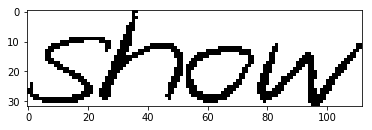

In [189]:
plt.imshow(bb[73], cmap='gray')

In [210]:
strs = infer(trec2, bb)

In [211]:
strs[73]

'show'

In [206]:
eds = []
pref = 0
for i, l in enumerate(s.lengths):
    eds.append(ed.eval(strs[i], s.text[pref:pref+l]))
    pref += l

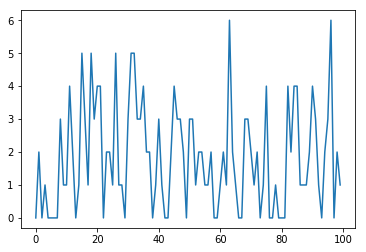

In [207]:
plt.plot(eds)
plt.show()

In [208]:
strs[10], s.text[sum(s.lengths[:10]):sum(s.lengths[:11])]

('deay', 'delay')

In [97]:
[ord(c) - ord('a') + 1 for c in 'final']

[6, 9, 14, 1, 12]

In [94]:
chr(15+ord('a')-1)

'o'

In [60]:
cost.detach().numpy()

array([4.62497902e+00, 4.41664681e-02, 1.37213392e+01, 3.89459670e-01,
       1.72309837e+01, 7.30488524e-02, 5.03612900e+00, 1.50454378e+01,
       1.82703686e+01, 5.85189741e-03, 3.54609132e+00, 2.91308742e-02,
       1.68312788e-02, 5.20143658e-03, 2.52791513e-02, 4.36871195e+00,
       7.38436580e-02, 4.82455224e-01, 3.92475873e-02, 2.10230947e-02,
       1.45902061e+00, 1.10390961e-01, 1.25321504e-02, 2.85040699e-02,
       9.76796722e+00, 1.33989811e+00, 3.04755747e-01, 1.04705784e-02,
       6.35044098e+00, 4.49876534e-03, 4.78300190e+00, 1.18103996e-01,
       8.23808479e+00, 3.11822653e+00, 4.24816251e-01, 9.24596339e-02,
       3.70612964e-02, 7.02427775e-02, 3.89470533e-03, 9.99843597e+00,
       2.08655193e-01,            inf, 9.74228096e+00, 1.13136053e+01,
       5.49156852e-02, 1.24346981e+01, 5.24043131e+00, 1.93744525e-02,
       6.19794464e+00, 1.23256648e+00, 2.20449853e+00, 2.95391216e+01,
       3.35923004e+00, 6.65389442e+00, 9.59533882e+00, 3.45166847e-02,
      

In [221]:
%%time
lines = ds.IAMDataset('lines', 
                      '/Users/atadenizaydin/Documents/course material/cs491/mxnet/dataset/iamdataset',
                      msb=True, tabulate=True, sort=True)

CPU times: user 2.13 s, sys: 285 ms, total: 2.41 s
Wall time: 2.98 s


In [270]:
sl = lines.samlist[50]
al = cv2.imread(sl.path, cv2.IMREAD_GRAYSCALE)

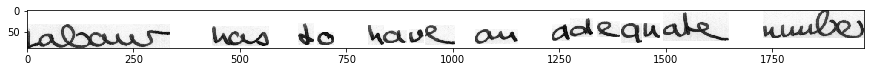

In [271]:
plt.figure().set_size_inches(15, 8)
plt.imshow(al, cmap='gray')
plt.show()

In [272]:
ker = np.ones((5,5),np.uint8)
ac = cv2.morphologyEx(al, cv2.MORPH_OPEN, ker)
ab = cv2.threshold(ac, sl.thres, 255, cv2.THRESH_BINARY)[1]

In [262]:
ker = np.ones((3,3),np.uint8)
alr = cv2.morphologyEx(alr, cv2.MORPH_OPEN, ker)

In [273]:
h, w = al.shape
h, w = 32, int(w/h*32)
alr = cv2.resize(ab, (w, h))

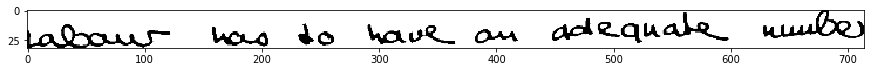

In [274]:
plt.figure().set_size_inches(15, 8)
plt.imshow(alr, cmap='gray')
plt.show()

In [275]:
infer(trec2, alr.reshape((1,)+alr.shape))

['waowasoarseodscuateuiller']

In [276]:
sl.fname

'a01-007u-04'

In [278]:
iam.samples['a01']['007u']['04']

{'00': Sample('a01-007u-04-00'),
 '01': Sample('a01-007u-04-01'),
 '02': Sample('a01-007u-04-02'),
 '03': Sample('a01-007u-04-03'),
 '04': Sample('a01-007u-04-04'),
 '05': Sample('a01-007u-04-05'),
 '06': Sample('a01-007u-04-06')}

In [283]:
d = iam.samples['a01']['007u']['04']
sls = [d[i] for i in iam.indices[3] if i in d]

In [284]:
[s.text for s in sls]

['Labour', 'has', 'to', 'have', 'an', 'adequate', 'number']

In [285]:
imgs = [cv2.imread(s.path, cv2.IMREAD_GRAYSCALE) for s in sls]

In [287]:
imgs = [cv2.resize(a, (int(a.shape[1]/a.shape[0]*32), 32)) for a in imgs]

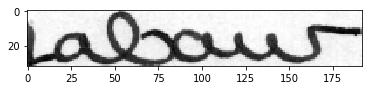

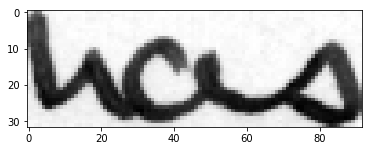

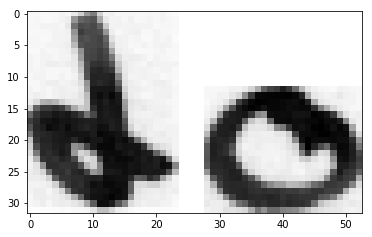

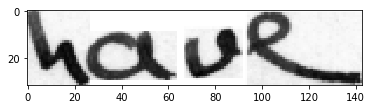

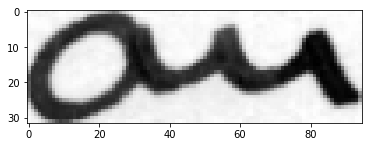

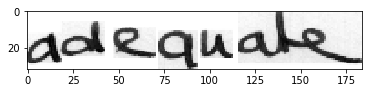

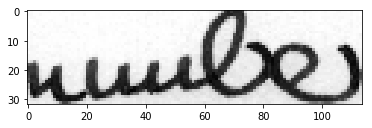

In [290]:
for a in imgs:
    plt.figure()
    plt.imshow(a, cmap='gray')

In [288]:
[infer(trec2, a.reshape((1,)+a.shape)) for a in imgs]

[['iabvsa'],
 ['inaas'],
 ['ita'],
 ['iscib'],
 ['iaa'],
 ['solaual'],
 ['ievealtso']]

In [291]:
imgs = [cv2.threshold(a, s.thres, 255, cv2.THRESH_BINARY)[1] for (a, s) in zip(imgs, sls)]

In [292]:
[infer(trec2, a.reshape((1,)+a.shape)) for a in imgs]

[['vabou'], ['hews'], ['to'], ['hovrse'], ['ou'], ['adreamate'], ['muuber']]